In [114]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import preprocessing as pp

In [115]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
    
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis = 1).reshape(-1, 1)

def sigmoid_derivative(z):
    result = sigmoid(z)
    return result * (1 - result)

In [116]:
def cross_entropy(y, y_predicted):
    cross_entrop = (-1.0 / y.shape[0]) * np.sum(np.multiply(np.log(y_predicted), y))
    return cross_entrop

def cost_function(y, y_predicted, theta1, theta2, lmbda):
    m = y.shape[0]
    return cross_entropy(y, y_predicted) + (lmbda / (2 * m)) * (np.sum(theta1 ** 2) + np.sum(theta2 ** 2))

In [117]:
def forward_propagate(x, theta1, theta2, bias1, bias2):
    z1 = x.dot(theta1.T) + bias1
    a1 = sigmoid(z1)
    
    z2 = z1.dot(theta2.T) + bias2
    a2 = softmax(z2)
    
    return a1, a2

def back_propagate(a1, a2, x, y, theta1, theta2, lmbda):   
    derivative2 = (1.0/x.shape[0]) * (a2 - y)
    new_theta2 = derivative2.T.dot(a1) + (lmbda / x.shape[0]) * theta2
    new_bias2 = np.sum(derivative2, axis = 0, keepdims = True)
    
    derivative1 = derivative2.dot(theta2) * sigmoid_derivative(a1)
    new_theta1 = derivative1.T.dot(x) + (lmbda / x.shape[0]) * theta1
    new_bias1 = np.sum(derivative1, axis = 0, keepdims = True)
    
    return new_theta2, new_bias2, new_theta1, new_bias1

In [118]:
training_dataset = pp.load_dataset('data/mnist_train.csv', ',')
testing_dataset = pp.load_dataset('data/mnist_test.csv', ',')

print(training_dataset.shape, testing_dataset.shape)

(60000, 785) (10000, 785)


In [119]:
x_train, y_train = pp.extract_x_and_y(training_dataset)
x_test, y_test = pp.extract_x_and_y(testing_dataset)

y_train_copy = y_train[:]
y_test_copy = y_test[:]

#one hot encoding for y_train
zeros_array = np.zeros((y_train.shape[0], 10))
zeros_array[np.arange(0, y_train.shape[0]), y_train[: ,0]] = 1
y_train = zeros_array[:]

#one hot for y_test
zeros_array = np.zeros([y_test.shape[0], 10])
zeros_array[np.arange(0, y_test.shape[0]), y_test[:, 0]] = 1
y_test = zeros_array[:]

# feature scaling
x_train = pp.normalize2(x_train)
x_test = pp.normalize2(x_test)

# # add column of 1s
# x_train = pp.insert_ones_column(x_train)
# x_test = pp.insert_ones_column(x_test)

y_train.shape

(60000, 10)

In [120]:
epochs = 400
learning_rate = 0.96669
lmbda = 0.8
number_of_neurons = 100

theta1 = np.random.rand(number_of_neurons, x_train.shape[1]) * 0.01
bias1 = np.random.rand(number_of_neurons) 
theta2 = np.random.rand(10, number_of_neurons) * 0.01
bias2 = np.random.rand(10)

Epoch:  0 Cost:  2.342317238142288
Epoch:  1 Cost:  2.65203974325538
Epoch:  2 Cost:  3.49816620862782
Epoch:  3 Cost:  4.008766654123129
Epoch:  4 Cost:  3.563322252332017
Epoch:  5 Cost:  3.2636715350707703
Epoch:  6 Cost:  2.6455276088257422
Epoch:  7 Cost:  2.5009804584915263
Epoch:  8 Cost:  2.4515029497311134
Epoch:  9 Cost:  2.3937594092226018
Epoch:  10 Cost:  2.369456815506309
Epoch:  11 Cost:  2.339161274082073
Epoch:  12 Cost:  2.335614548671025
Epoch:  13 Cost:  2.31536420179914
Epoch:  14 Cost:  2.3146414201104863
Epoch:  15 Cost:  2.300713129833063
Epoch:  16 Cost:  2.3013737024465724
Epoch:  17 Cost:  2.2909588845633064
Epoch:  18 Cost:  2.2919202668097785
Epoch:  19 Cost:  2.2832780314629457
Epoch:  20 Cost:  2.283924502465527
Epoch:  21 Cost:  2.2760580684756087
Epoch:  22 Cost:  2.2760386344270973
Epoch:  23 Cost:  2.2683552259586404
Epoch:  24 Cost:  2.267434356852472
Epoch:  25 Cost:  2.2595325699535302
Epoch:  26 Cost:  2.2575106049022957
Epoch:  27 Cost:  2.249069

Epoch:  220 Cost:  0.4521688615653833
Epoch:  221 Cost:  0.451046590854465
Epoch:  222 Cost:  0.449938124788688
Epoch:  223 Cost:  0.44884322260239856
Epoch:  224 Cost:  0.44776164883282477
Epoch:  225 Cost:  0.4466931731603895
Epoch:  226 Cost:  0.44563757025582046
Epoch:  227 Cost:  0.44459461963371116
Epoch:  228 Cost:  0.44356410551219766
Epoch:  229 Cost:  0.4425458166784424
Epoch:  230 Cost:  0.44153954635962667
Epoch:  231 Cost:  0.4405450920991671
Epoch:  232 Cost:  0.43956225563789586
Epoch:  233 Cost:  0.43859084279994526
Epoch:  234 Cost:  0.43763066338310164
Epoch:  235 Cost:  0.43668153105340085
Epoch:  236 Cost:  0.4357432632437493
Epoch:  237 Cost:  0.4348156810563722
Epoch:  238 Cost:  0.43389860916889117
Epoch:  239 Cost:  0.4329918757438551
Epoch:  240 Cost:  0.43209531234154946
Epoch:  241 Cost:  0.43120875383592483
Epoch:  242 Cost:  0.4303320383334877
Epoch:  243 Cost:  0.4294650070950137
Epoch:  244 Cost:  0.42860750445994145
Epoch:  245 Cost:  0.42775937777332246

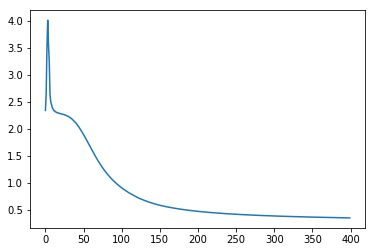

0.3564831900949764


In [121]:
#training
costs = np.array([])

for index in range(0, epochs):
    
    a1, a2 = forward_propagate(x_train, theta1, theta2, bias1, bias2)
    cost = cost_function(y_train, a2, theta1, theta2, lmbda)
    print("Epoch: ", index, "Cost: ", cost)
    costs = np.append(costs, cost)
    
    new_theta2, new_bias2, new_theta1, new_bias1 = back_propagate(a1, a2, x_train, y_train, theta1, theta2, lmbda) 
    
    theta2 = theta2 - alpha * new_theta2
    bias2 = bias2 - alpha * new_bias2
    theta1 = theta1 - alpha * new_theta1
    bias1 = bias1 - alpha * new_bias1
    
plt.plot(range(len(costs)), costs)
plt.show()
print(costs[-1])


In [122]:
_, predictions = forward_propagate(x_test, theta1, theta2, bias1, bias2)
actual_predictions = np.argmax(predictions, axis = 1)[:, np.newaxis]
check = (actual_predictions == y_test_copy)
print('The accuracy is: ', round((np.count_nonzero(check) / actual_predictions.shape[0] * 100), 2), '%')

The accuracy is:  90.35 %
